# **SSVEP Offline Analysis**

In [43]:
# !pip install mne numpy matplotlib scikit-learn

# **Step 1** We wiil use mne-python to read the EEG recorded file 

In [44]:
# import require library
import mne
import numpy as np
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from mne.datasets import eegbci
from sklearn.metrics import classification_report,confusion_matrix

# read biosami file (bdf)
raw = mne.io.read_raw_bdf("Testdata3.bdf", preload=True) 
eegbci.standardize(raw)

# Set channel location for data
montage = make_standard_montage("biosemi64")
raw.set_montage(montage, on_missing='ignore')

Extracting EDF parameters from c:\git\FRA500_Tutorial\Testdata3.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 403455  =      0.000 ...   197.000 secs...


Measurement date,"August 23, 2024 16:16:31 GMT"
Experimenter,Unknown
Participant,
Digitized points,67 points
Good channels,"72 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,2048.00 Hz
Highpass,0.00 Hz
Lowpass,417.00 Hz


**resample EEG data for reduce memory usage** 

In [45]:
raw = raw.copy().resample(512)
raw

Trigger channel STATUS has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
61 events found on stim channel STATUS
Event IDs: [ 1  2  4  8 10 20 40]
Trigger channel STATUS has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
61 events found on stim channel STATUS
Event IDs: [ 1  2  4  8 10 20 40]


Measurement date,"August 23, 2024 16:16:31 GMT"
Experimenter,Unknown
Participant,
Digitized points,67 points
Good channels,"72 EEG, 1 Stimulus"
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,256.00 Hz


**check channel name** 

In [46]:
raw.ch_names

['Fp1',
 'AF7',
 'AF3',
 'F1',
 'F3',
 'F5',
 'F7',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'C1',
 'C3',
 'C5',
 'T7',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'P1',
 'P3',
 'P5',
 'P7',
 'P9',
 'PO7',
 'PO3',
 'O1',
 'Iz',
 'Oz',
 'POz',
 'Pz',
 'CPz',
 'Fpz',
 'Fp2',
 'AF8',
 'AF4',
 'AFz',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'FT8',
 'FC6',
 'FC4',
 'FC2',
 'FCz',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'TP8',
 'CP6',
 'CP4',
 'CP2',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO8',
 'PO4',
 'O2',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'STATUS']

# **Step 2** Apply filter

**raw data plotting**

Effective window size : 4.000 (s)


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


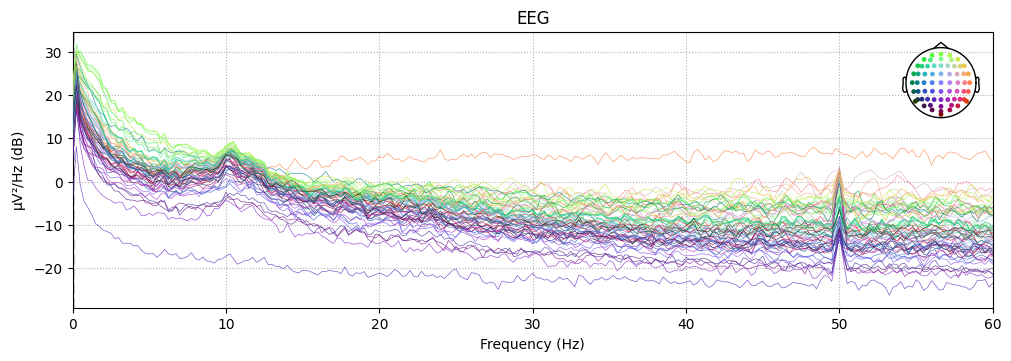

In [47]:
raw.compute_psd(fmax=60).plot(picks=raw.ch_names[0:64])
plt.show()

**apply notch filter**

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.1s finished
C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


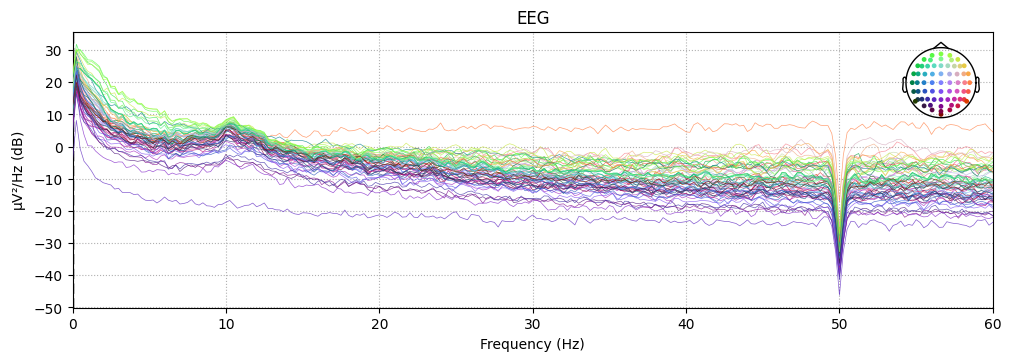

In [48]:
raw_filter = raw.copy().notch_filter(freqs=50) #notch filter function

raw_filter.compute_psd(fmax=60).plot(picks=raw.ch_names[0:64])
plt.show()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1691 samples (3.303 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


Effective window size : 4.000 (s)


[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.1s finished
C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


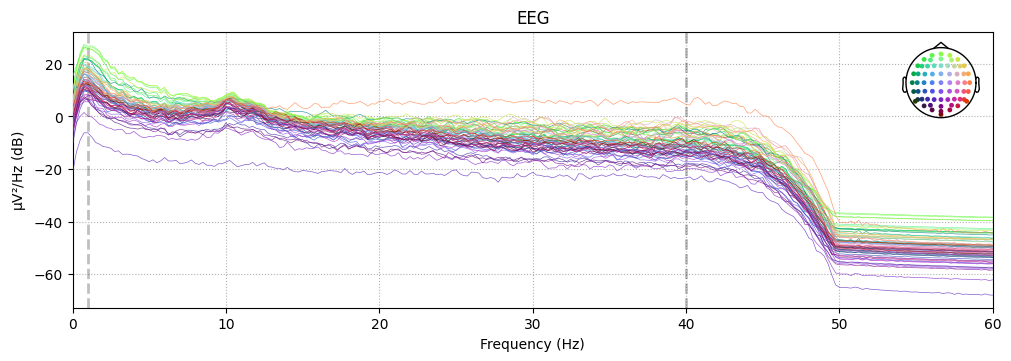

In [49]:
raw_filter = raw_filter.copy().filter(l_freq=1, h_freq=40) #band-pass function

raw_filter.compute_psd(fmax=60).plot(picks=raw.ch_names[0:64])
plt.show()

# **STEP3** Epoching

In [50]:
events = mne.find_events(raw, shortest_event = 0) #command for get events and timestamp

#Define what event numbers is
event_dict =  {'12Hz': 8,
'24Hz': 4,
'6Hz': 10,
'30Hz': 2,
'trial_begin': 1,
'trial_end': 20,
'end_exper': 40
}

events

Trigger channel STATUS has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
61 events found on stim channel STATUS
Event IDs: [ 1  2  4  8 10 20 40]


array([[ 9223,     0,     1],
       [ 9735,     0,     8],
       [12295,     0,    20],
       [13320,     0,     1],
       [13833,     0,     2],
       [16393,     0,    20],
       [17417,     0,     1],
       [17930,     0,     4],
       [20491,     0,    20],
       [21515,     0,     1],
       [22028,     0,    10],
       [24588,     0,    20],
       [25612,     0,     1],
       [26124,     0,    10],
       [28685,     0,    20],
       [29709,     0,     1],
       [30222,     0,     2],
       [32783,     0,    20],
       [33808,     0,     1],
       [34320,     0,     2],
       [36880,     0,    20],
       [37904,     0,     1],
       [38417,     0,    10],
       [40977,     0,    20],
       [42001,     0,     1],
       [42513,     0,    10],
       [45073,     0,    20],
       [46098,     0,     1],
       [46611,     0,     8],
       [49171,     0,    20],
       [50196,     0,     1],
       [50708,     0,    10],
       [53268,     0,    20],
       [54

In [51]:
Epochs = mne.Epochs(raw, events, 
    tmin= -1.0,  
    tmax= 5.0,    
    event_id=event_dict,
    preload = True,
    event_repeated='drop',
    baseline=(-1.0, 0.0),
    verbose=True
    )

Not setting metadata
61 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 61 events and 3073 original time points ...
0 bad epochs dropped


In [52]:
Epochs

Number of events,61
Events,12Hz: 524Hz: 530Hz: 56Hz: 5end_exper: 1trial_begin: 20trial_end: 20
Time range,-1.000 – 5.000 s
Baseline,-1.000 – 0.000 s


In [53]:
Epochs = Epochs.copy().crop(tmin = 0.0, tmax = 5.0) #crop data for 5 seconds after target represent

In [54]:
from scipy import signal

def butter_bandpass(lowcut,highcut,fs,order):
    nyq = 0.5*fs
    low = lowcut/nyq
    high = highcut/nyq
    b,a = signal.butter(order,[low,high],'bandpass')
    return b,a

def butter_bandpass_filter(data,lowcut = 6,highcut = 30, order = 8):
    b,a = butter_bandpass(lowcut,highcut,128,order)
    y = signal.filtfilt(b,a,data,axis=2)
    return y



# **STEP 4** Input information (change data domain)

**FFT plot**

C:\Users\pipo_\AppData\Local\Temp\ipykernel_23984\149861192.py:3: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  selected_data = Epochs['24Hz'].pick(['Oz']).get_data() # select 12Hz epoch and select channel "Oz" to FFT plot
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


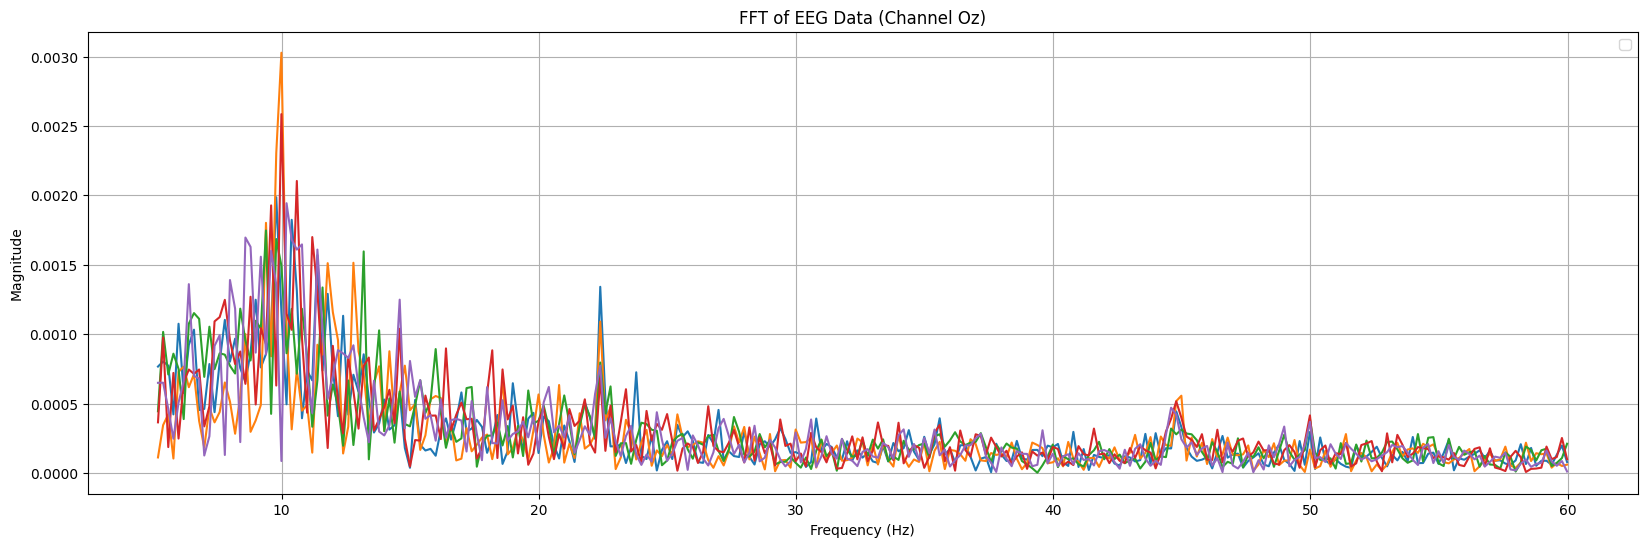

In [55]:
# Compute FFT
sampling_rate = 512
selected_data = Epochs['24Hz'].pick(['Oz']).get_data() # select 12Hz epoch and select channel "Oz" to FFT plot


plt.figure(figsize=(20, 6))
for epoch in range(selected_data.shape[0]): # Loop for apply every epoch
    
    fft_result = np.fft.fft(selected_data[epoch,0,:])
    fft_magnitude = np.abs(fft_result)  # Magnitude of the FFT
    fft_frequency = np.fft.fftfreq(selected_data.shape[2], 1/sampling_rate)  # Frequency axis

    # Select frequencies between 5 Hz and 60 Hz to plot
    freq_mask = (fft_frequency >= 5) & (fft_frequency <= 60)
    filtered_magnitude = fft_magnitude[freq_mask]
    filtered_frequency = fft_frequency[freq_mask]
    plt.plot(filtered_frequency, filtered_magnitude)

# Customize the plot
plt.title(f'FFT of EEG Data (Channel Oz)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

**PSD plot**

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


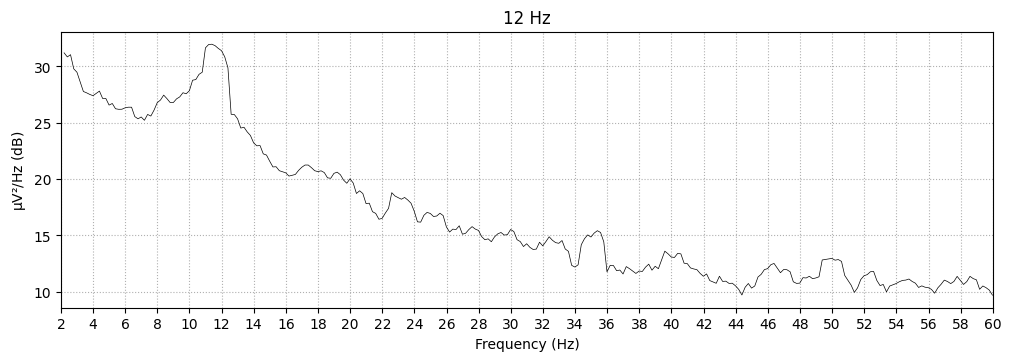

In [56]:
# Compute the PSD
psd = Epochs['12Hz'].pick(['Oz']).compute_psd(fmin=2.0, fmax=60.0) #select 12Hz epoch and select channel "Oz" 

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('12 Hz')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


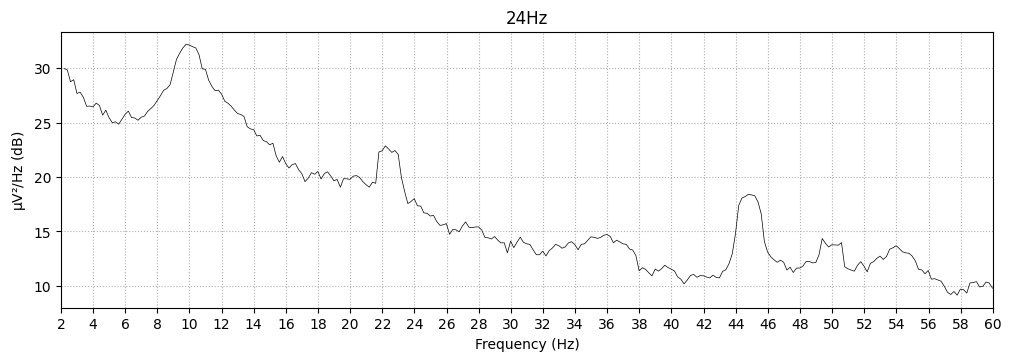

In [57]:
# Compute the PSD
psd = Epochs['24Hz'].pick(['Oz']).compute_psd(fmin=2.0, fmax=60.0) #select 12Hz epoch and select channel "Oz" 

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('24Hz')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


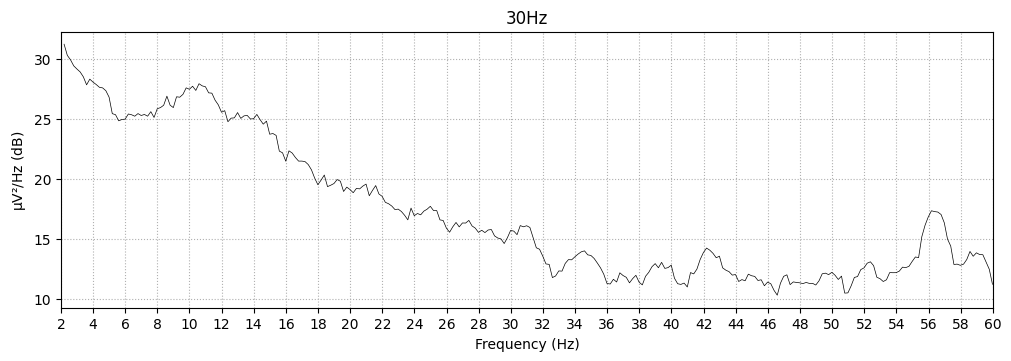

In [58]:
# Compute the PSD
psd = Epochs['30Hz'].pick(['Oz']).compute_psd(fmin=2.0, fmax=60.0) #select 12Hz epoch and select channel "Oz" 

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('30Hz')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


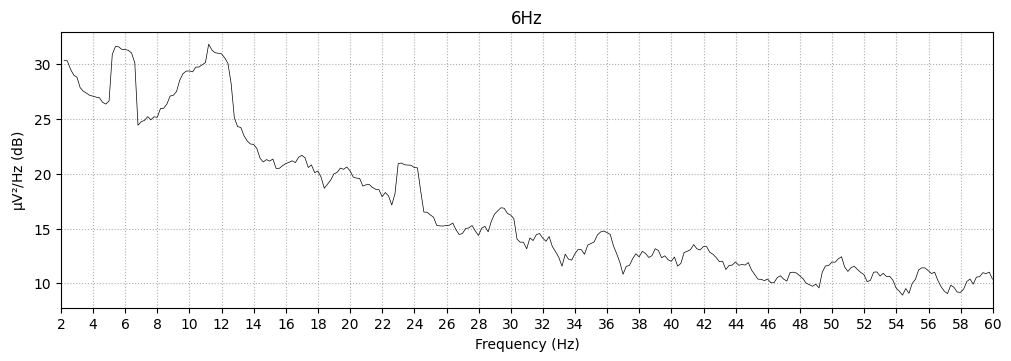

In [59]:
# Compute the PSD
psd = Epochs['6Hz'].pick(['Oz']).compute_psd(fmin=2.0, fmax=60.0) #select 12Hz epoch and select channel "Oz" 

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('6Hz')

plt.show()

    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs...


C:\Users\pipo_\AppData\Roaming\Python\Python311\site-packages\mne\viz\utils.py:165: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


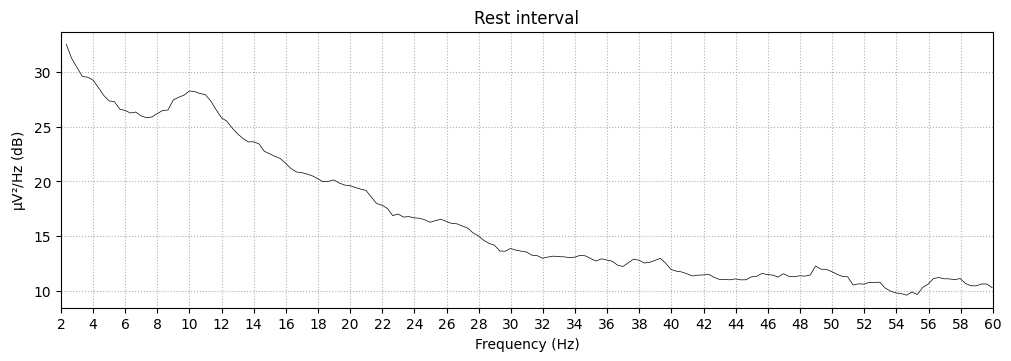

In [60]:
# Compute the PSD
psd = Epochs['trial_end'].pick(['Oz']).crop(tmin = 0.0, tmax = 3.0).compute_psd(fmin=2.0, fmax=60.0) #select 12Hz epoch and select channel "Oz" 

# Plot the PSD
fig = psd.plot(average=True, amplitude=False, picks="data", exclude="bads")

# Customize the x-axis labels
ax = fig.axes[0]  # Get the axis of the first subplot
ax.set_xticks(np.arange(2, 61, 2))  # Set x-axis ticks from 2 to 60
ax.set_xticklabels(np.arange(2, 61, 2))  # Set x-axis labels from 2 to 60
ax.set_title('Rest interval')

plt.show()

# **STEP 5** Classification

**Machine Learning**

In [61]:
from sklearn.svm import SVC
# Initialize and train the SVM model
psd_test = Epochs['12Hz','6Hz', '24Hz', '30Hz'].pick(['Oz']).compute_psd(fmin=3.0, fmax=50.0)
true_label = Epochs['12Hz','6Hz', '24Hz', '30Hz'].events[:,-1]

svm_model = SVC(kernel='rbf')  # Using a linear kernel
svm_model.fit(psd_test.get_data().reshape(psd_test.shape[0],psd_test.shape[2]), true_label)

print('accuracy', svm_model.score(psd_test.get_data().reshape(psd_test.shape[0],psd_test.shape[2]), true_label))

def GetConfusionMatrix(models, X_train, y_train, label_names):
    y_pred = models.predict(X_train)
    print("Classification TRAIN DATA \n=======================")
    print(classification_report(y_true= y_train, y_pred=y_pred, target_names=label_names))
    print("Confusion matrix \n=======================")
    print(confusion_matrix(y_true= y_train, y_pred=y_pred))

label_names = ['12Hz', '6Hz', '24Hz', '30Hz']

GetConfusionMatrix(svm_model, psd_test.get_data().reshape(psd_test.shape[0],psd_test.shape[2]), true_label, label_names)

    Using multitaper spectrum estimation with 7 DPSS windows
accuracy 0.95
Classification TRAIN DATA 
              precision    recall  f1-score   support

        12Hz       0.83      1.00      0.91         5
         6Hz       1.00      0.80      0.89         5
        24Hz       1.00      1.00      1.00         5
        30Hz       1.00      1.00      1.00         5

    accuracy                           0.95        20
   macro avg       0.96      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20

Confusion matrix 
[[5 0 0 0]
 [1 4 0 0]
 [0 0 5 0]
 [0 0 0 5]]


**Thersholding**

In [62]:
baseline_Epochs = mne.Epochs(raw, events, 
    tmin= -4.0,  
    tmax= 0.0,    
    event_id=event_dict,
    preload = True,
    event_repeated='drop',
    baseline=(-4.0, -3.0),
    verbose=True
    )

baseline_Epochs = baseline_Epochs.copy().crop(tmin = -3.0, tmax = 0.0)
baseline_Epochs


Not setting metadata
61 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 61 events and 2049 original time points ...
0 bad epochs dropped


Number of events,61
Events,12Hz: 524Hz: 530Hz: 56Hz: 5end_exper: 1trial_begin: 20trial_end: 20
Time range,-3.000 – 0.000 s
Baseline,-4.000 – -3.000 s


In [68]:
import numpy as np

psd_baseline = baseline_Epochs['12Hz','6Hz', '24Hz', '30Hz'].pick(['Oz']).compute_psd(fmin=3.0, fmax=50.0)
psd_aftercue = Epochs['12Hz','6Hz', '24Hz', '30Hz'].pick(['Oz']).compute_psd(fmin=3.0, fmax=50.0)

# Define target frequencies and their labels
target_frequencies = [12.0, 6.0, 24.0, 30.0]  # Hz
frequency_mapping = {12.0: 8, 6.0: 10, 24.0: 4, 30.0: 2}  # Map frequency to a label
# Frequency labels based on your events
labels = Epochs['12Hz','6Hz', '24Hz', '30Hz'].events[:, -1]  # Extract target labels for each epoch

# Get PSD values from the computed psd_baseline and psd_aftercue
baseline_psd, baseline_freqs = psd_baseline.get_data(return_freqs=True)  # Shape: (n_epochs, n_channels, n_freqs)
aftercue_psd, aftercue_freqs = psd_aftercue.get_data(return_freqs=True)  # Shape: (n_epochs, n_channels, n_freqs)

# Function to get the power at the target frequency from PSD for each epoch
def get_frequency_power(psd, freqs, target_freq):
    # Find the index of the frequency closest to the target frequency
    idx = np.argmin(np.abs(freqs - target_freq))
    return psd[:, :, idx]  # Return power at that frequency for all epochs

# Calculate power for each frequency of interest for all epochs
baseline_powers = {freq: get_frequency_power(baseline_psd, baseline_freqs, freq) for freq in target_frequencies}
aftercue_powers = {freq: get_frequency_power(aftercue_psd, aftercue_freqs, freq) for freq in target_frequencies}

# Threshold for SSVEP detection
threshold = 1.5 # Adjust this threshold as needed

# Detect SSVEP for each epoch and frequency, and store detected labels
detected_labels = []  # This will store the detected label for each epoch

for epoch_idx in range(aftercue_psd.shape[0]):  # Loop over each epoch
    # Store whether SSVEP is detected for each target frequency
    detection_results = {}
    
    for freq in target_frequencies:
        epoch_baseline_power = baseline_powers[freq][epoch_idx, 0]  # Power at this frequency for the baseline (Oz channel)
        epoch_aftercue_power = aftercue_powers[freq][epoch_idx, 0]  # Power at this frequency for the after-cue (Oz channel)
        
        # Detect SSVEP based on threshold for this frequency
        if epoch_aftercue_power > threshold * epoch_baseline_power:
            detection_results[freq] = epoch_aftercue_power
        else:
            detection_results[freq] = 0  # No SSVEP detected for this frequency

    # Determine which frequency has the highest power if detected
    if any(detection_results.values()):  # Check if there is any SSVEP detection
        detected_freq = max(detection_results, key=detection_results.get)  # Get frequency with max power
        detected_label = frequency_mapping[detected_freq]  # Convert frequency to label
    else:
        detected_label = 8  # No SSVEP detected (assign a default label 12 Hz)

    detected_labels.append(detected_label)

# Calculate accuracy by comparing detected labels to true labels
accuracy = np.mean(np.array(detected_labels) == labels) * 100

# Print classification results
print("Detected Labels for each Epoch:", detected_labels)
print("True Labels for each Epoch:   ", labels.tolist())
print(f"Classification Accuracy: {accuracy:.2f}%")


    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Detected Labels for each Epoch: [8, 2, 4, 8, 10, 2, 8, 10, 10, 8, 10, 8, 10, 8, 8, 8, 8, 4, 8, 10]
True Labels for each Epoch:    [8, 2, 4, 10, 10, 2, 2, 10, 10, 8, 10, 4, 2, 4, 8, 2, 8, 4, 8, 4]
Classification Accuracy: 65.00%
